# Table of Contents
 <p>

let's try a rejection sampling example just to be sure we get this

In [32]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib notebook

In [41]:
a = 10

Xnorm = stats.norm(loc=a,scale=2)
Xgamma = stats.gamma(a=a)

<IPython.core.display.Javascript object>


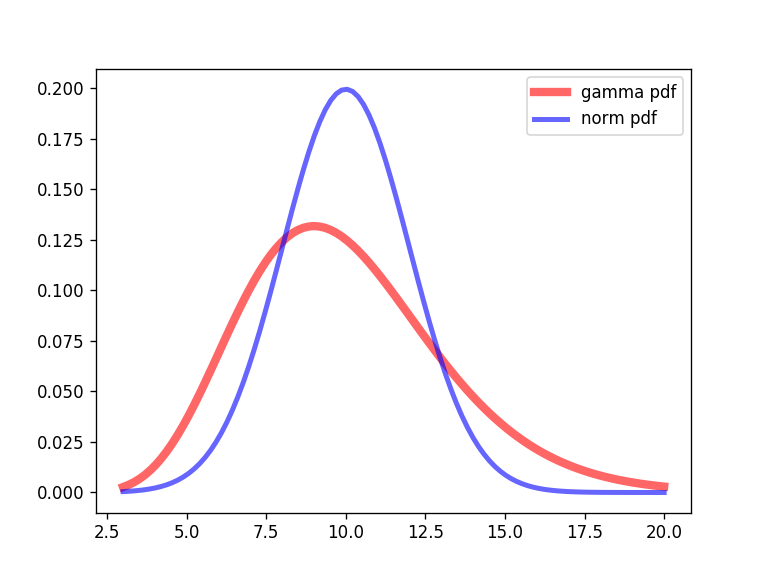

In [59]:
fig, ax = plt.subplots()

x = np.linspace(Xgamma.ppf(0.01),
                Xgamma.ppf(0.99), 100)
#ppf is the percent point function -- the inverse of the cdf 
x = np.linspace(3,20,100) #this also works
ax.plot(x, Xgamma.pdf(x),'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.plot(x,Xnorm.pdf(x),'b-',lw=3,alpha=0.6, label='norm pdf')
plt.legend(loc='best')

Let's see if we can use the gamma distribution to simulate our normal distribution?

scaling constant is 1.64352980096


<IPython.core.display.Javascript object>


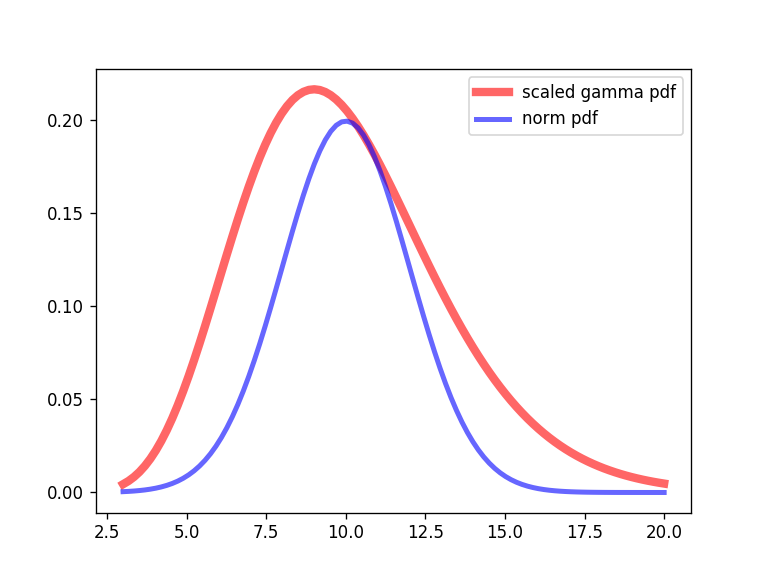

In [74]:
#c is our scaling constant so that our proposed distribution (gamma) envelops our
#desired distribution (normal)
c = max(Xnorm.pdf(x)/Xgamma.pdf(x))
print 'scaling constant is ' + str(c)

fig, ax = plt.subplots()

ax.plot(x, c*Xgamma.pdf(x),'r-', lw=5, alpha=0.6, label='scaled gamma pdf')
ax.plot(x,Xnorm.pdf(x),'b-',lw=3,alpha=0.6, label='norm pdf')
plt.legend(loc='best')

In [69]:
N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # draw a sample from our proposal distribution
    sample = Xgamma.rvs(1)
    
    # pick a uniform number on [0, 1)
    y = np.random.uniform(0,1)
    
    # Do the accept/reject comparison
    if y < Xnorm.pdf(sample)/(c*Xgamma.pdf(sample)):
        samples[accepted] = sample
        accepted += 1
    
    count +=1
    
print("Count", count, "Accepted", accepted)


('Count', 16366, 'Accepted', 10000)


<IPython.core.display.Javascript object>


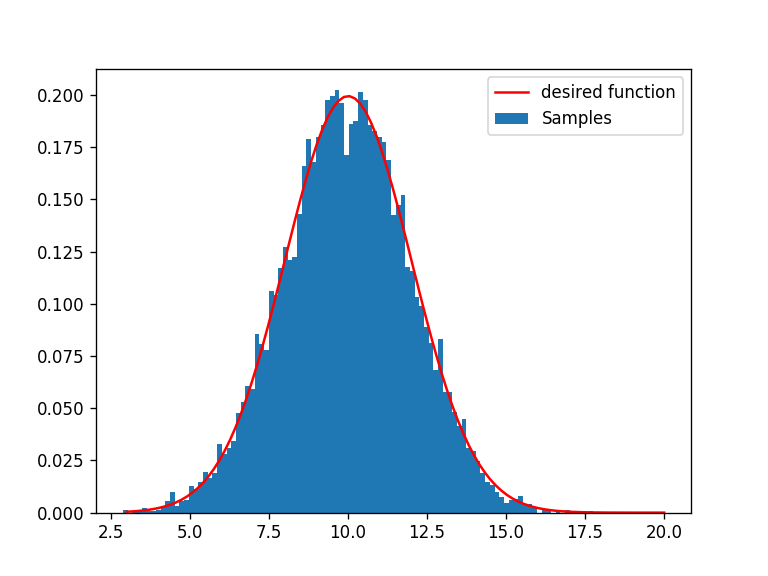

In [80]:
fig, ax = plt.subplots()

# plot the histogram
plt.hist(samples,bins=100, label=u'Samples',normed=True);

# plot our (normalized) function
plt.plot(x, Xnorm.pdf(x), 'r', label=u'desired function')

# turn on the legend
plt.legend()

<IPython.core.display.Javascript object>


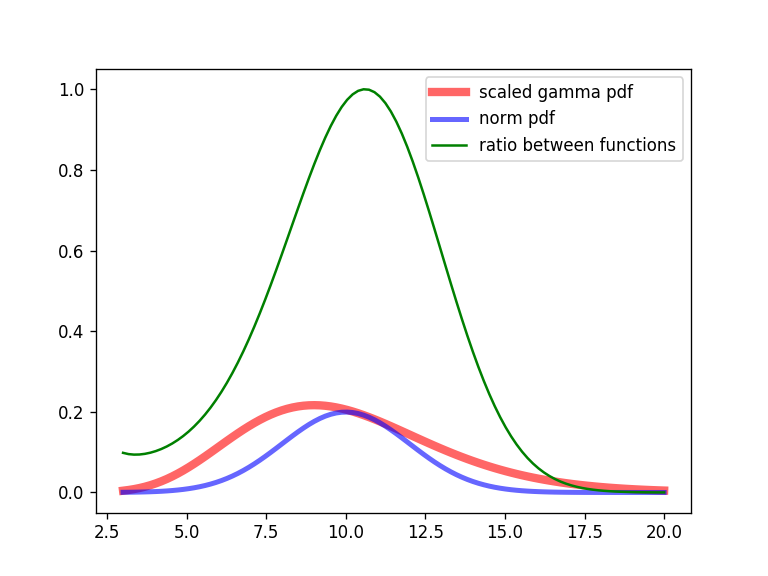

In [85]:
fig, ax = plt.subplots()

ax.plot(x, c*Xgamma.pdf(x),'r-', lw=5, alpha=0.6, label='scaled gamma pdf')
ax.plot(x,Xnorm.pdf(x),'b-',lw=3,alpha=0.6, label='norm pdf')
ax.plot(x,(Xnorm.pdf(x)/(c*Xgamma.pdf(x))),'g-',label='ratio between functions')

plt.legend(loc='best')